# 🚗 Car Price Prediction Project

### Import libraries

In [2]:

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import gradio as gr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings('ignore')

### Load Dataset

In [4]:
from google.colab import files
uploaded = files.upload()


Saving quikr_car.csv to quikr_car (4).csv


# New section

In [5]:
car=pd.read_csv('quikr_car.csv')

In [6]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


### Initial Data Exploration

In [7]:
car.shape

(892, 6)

In [8]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


#### Unique Values Check

In [9]:
car['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [10]:
car['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [11]:
car['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [12]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

## Quality
* year has many non-year values
* year object to int
* price has Ask For Price
* Price object to int
* kms_driven has kms with integers
* kms_driven object to int
* kms_driven has nan values
* fuel-type has nan values
* keep first 3 words of name

## Data Cleaning

In [13]:
backup=car.copy()

#### Clean 'year' Column

In [14]:
car =car[car['year'].str.isnumeric()]

In [15]:
car['year']=car['year'].astype(np.int32)

#### Clean 'Price' Column

In [16]:
car=car[car['Price']!="Ask For Price"]

In [17]:
car['Price'] = car['Price'].astype(str)
car['Price']=car['Price'].str.replace(',', '', regex=True).astype(np.int32)


#### Clean 'kms_driven' Column

In [18]:
car['kms_driven']=car['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [19]:
car=car[car['kms_driven'].str.isnumeric()]

In [20]:
car['kms_driven']=car['kms_driven'].astype(np.int32)

In [21]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


#### Remove Null Fuel Types

In [22]:
car=car[~car['fuel_type'].isna()]

#### Normalize 'name' Column

In [23]:
car['name']= car['name'].apply(
    lambda x: ' '.join(x[:3]) if isinstance(x, list)
    else ' '.join(str(x).split()[:3])
)


In [24]:
car=car.reset_index(drop=True)

In [25]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


#### Filter Out Extreme Prices

In [26]:
car=car[car['Price']<6e6].reset_index(drop=True)

In [27]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


### Save Cleaned Data

In [28]:
car.to_csv("Cleaned Car.csv",index=False)

### Data Visualization

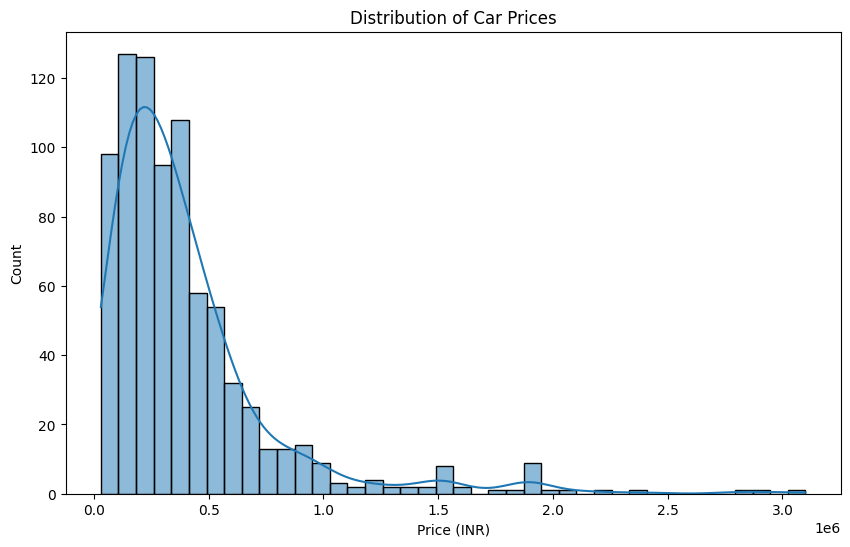

In [29]:

plt.figure(figsize=(10, 6))
sns.histplot(car['Price'], kde=True, bins=40)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Count')
plt.show()


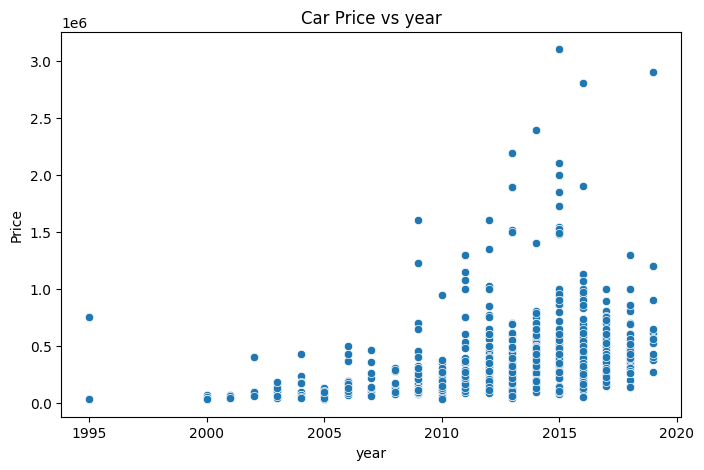

In [30]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=car['year'],y=car['Price'])
plt.title('Car Price vs year')
plt.show()


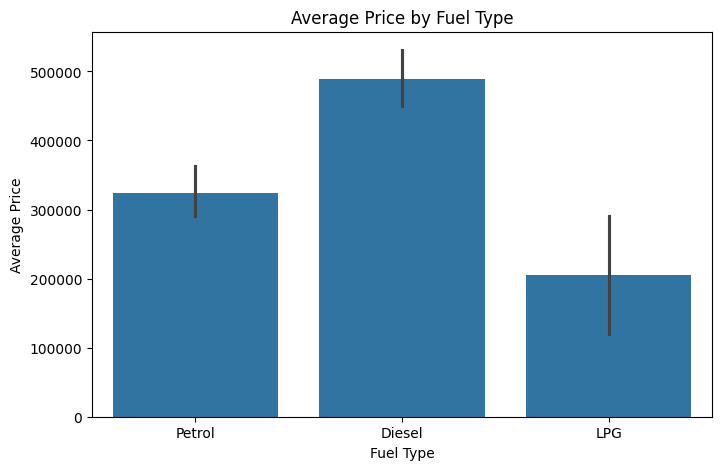

In [31]:
plt.figure(figsize=(8, 5))
sns.barplot(data=car, x='fuel_type', y='Price', estimator=np.mean)
plt.title('Average Price by Fuel Type')
plt.ylabel('Average Price')
plt.xlabel('Fuel Type')
plt.show()


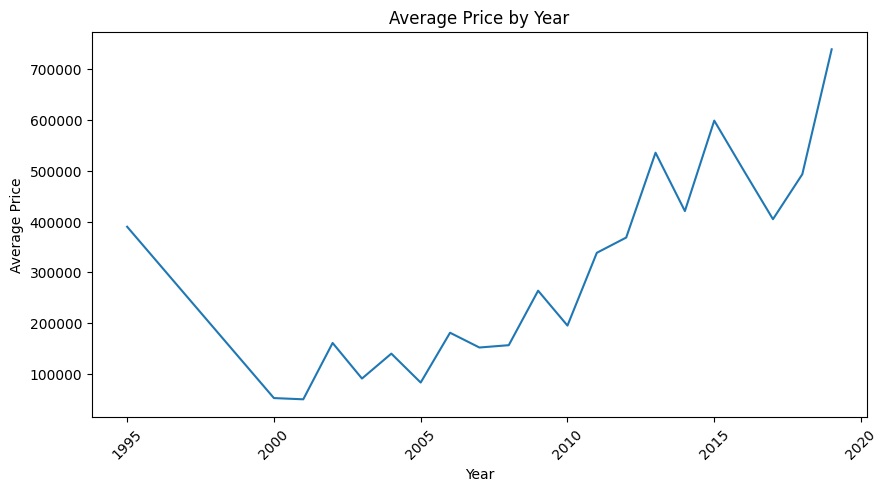

In [32]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=car.groupby('year')['Price'].mean().reset_index(), x='year', y='Price')
plt.title('Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


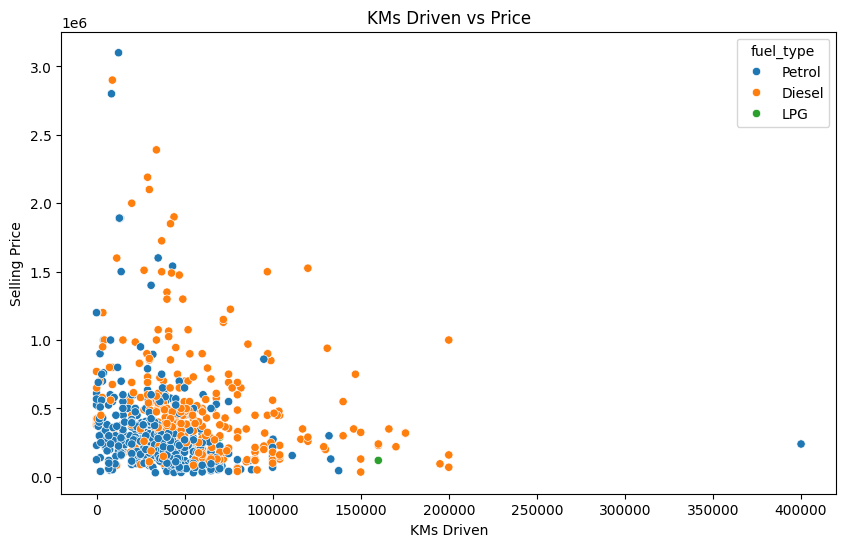

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=car, x='kms_driven', y='Price', hue='fuel_type')
plt.title('KMs Driven vs Price')
plt.xlabel('KMs Driven')
plt.ylabel('Selling Price')
plt.show()


## Model Preparation

In [34]:
X=car.drop(columns='Price')
y=car['Price']

### Model Training

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#### Encode + Train Linear Regression

In [36]:
num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(exclude=np.number).columns.tolist()
num_cols, cat_cols


(['year', 'kms_driven'], ['name', 'company', 'fuel_type'])

## Build Pipeline

In [37]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)
print('Model trained.')

Model trained.


### Model Evalution

In [38]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Accuracy:")
print(f"R² Score       : {r2:.4f}")
print(f"MAE            : {mae:.2f}")
print(f"MSE            : {mse:.2f}")
print(f"RMSE           : {rmse:.2f}")

Accuracy:
R² Score       : 0.6424
MAE            : 114032.35
MSE            : 72813676137.85
RMSE           : 269840.09


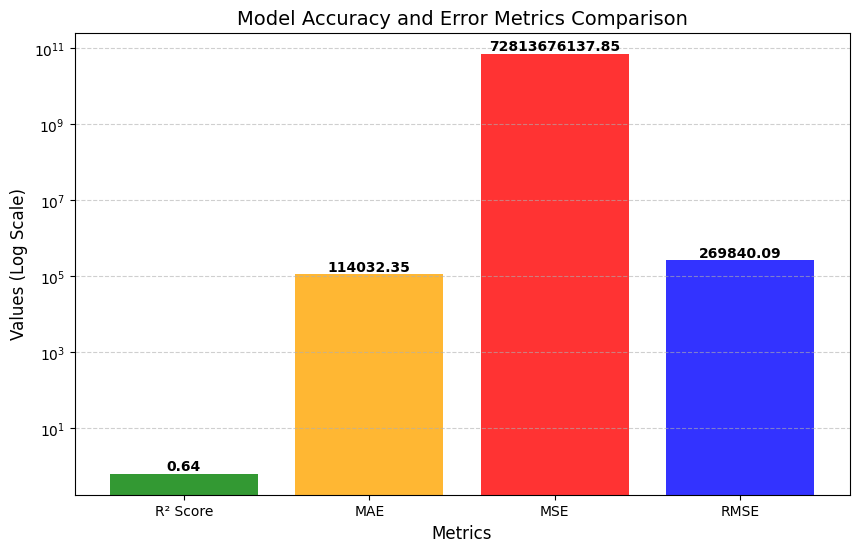

In [39]:
metrics = ['R² Score', 'MAE', 'MSE', 'RMSE']
values = [0.6424, 114032.35, 72813676137.85, 269840.09]

plt.figure(figsize=(10,6))
bars = plt.bar(metrics, values, color=['green', 'orange', 'red', 'blue'], alpha=0.8)

for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, val, f'{val:.2f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Model Accuracy and Error Metrics Comparison', fontsize=14)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values (Log Scale)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.yscale('log')   # 👈 important line
plt.show()


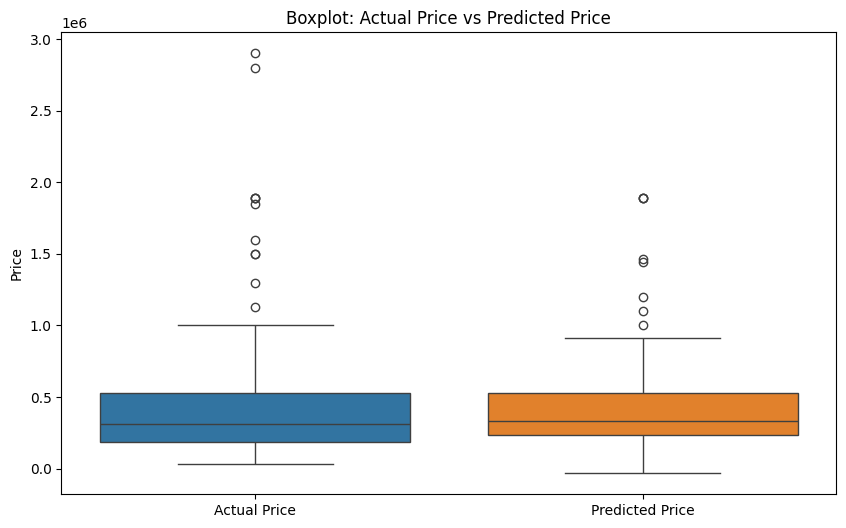

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=[y_test, y_pred])

plt.xticks([0, 1], ['Actual Price', 'Predicted Price'])
plt.title('Boxplot: Actual Price vs Predicted Price')
plt.ylabel('Price')
plt.show()


## Gradio

In [ ]:
def predict_price(year, kms_driven, fuel_type, company, name):
    data = {
        'year': [int(year)],
        'kms_driven': [int(kms_driven)],
        'fuel_type': [fuel_type],
        'company': [company]
    }
    # Include name only if available in the training set
    if 'name' in X.columns:
        data['name'] = [name]
    input_df = pd.DataFrame(data)
    pred = model.predict(input_df)[0]
    return f'Estimated Price: ₹ {int(pred):,}'

# UI choices
fuel_choices = sorted(car['fuel_type'].dropna().unique().tolist())
company_choices = sorted(car['company'].dropna().unique().tolist())
name_choices = []
if 'name' in car.columns:
    name_counts = car['name'].value_counts().head(50)
    name_choices = name_counts.index.tolist()

inputs = [
    gr.Number(label='Year'),
    gr.Number(label='Kms Driven'),
    gr.Dropdown(choices=fuel_choices, label='Fuel Type'),
    gr.Dropdown(choices=company_choices, label='Company'),
    gr.Dropdown(choices=name_choices, label='Car Name') if len(name_choices) > 0 else gr.Textbox(label='Car Name (optional)', value='')
]

demo = gr.Interface(
    fn=predict_price,
    inputs=inputs,
    outputs=gr.Textbox(label='Predicted Price')
)

#Uncomment to launch in notebook runtime
demo.launch(debug=True)



Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://90f057763dbedb23ec.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
